# Module 4 - Data Visualization

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#these are different types of visualization databases that you can use to deal with your data. 

%matplotlib inline

In [3]:
df = pd.read_csv("datasets/Pokemon.csv", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
#rename the pound/hashtag(#) column so it doesn't cause further issues. Taking the column with # symbol and changing it to Number.
df.rename(columns={'#': 'Number'}, inplace =True)

In [4]:
#validate
df.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [ ]:
#set indices as Pokemon numbers
df.set_index('Number', inplace=True)
df.head()

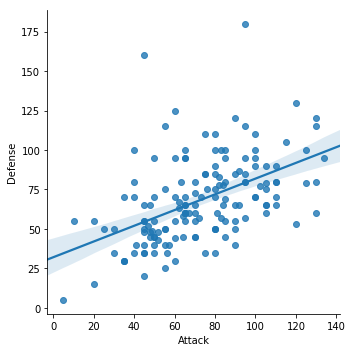

In [5]:
#make a scatterplot
sns.lmplot(x='Attack', y='Defense', data=df)

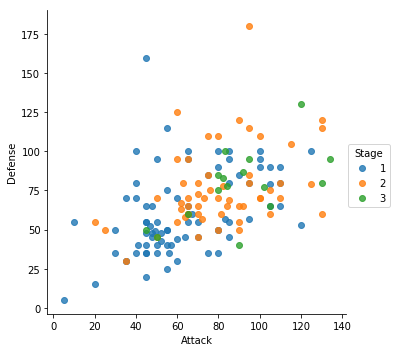

In [6]:
#add more details to scatterplot
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, #remove regression line
           hue='Stage')   #color by evolution stage

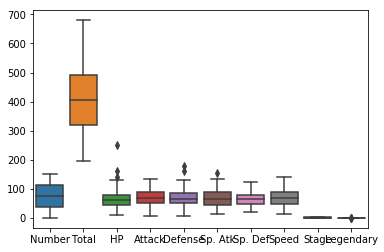

In [7]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

In [4]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
stats_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80


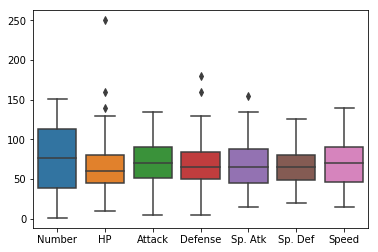

In [9]:
#boxplot for stats
sns.boxplot(data=stats_df)

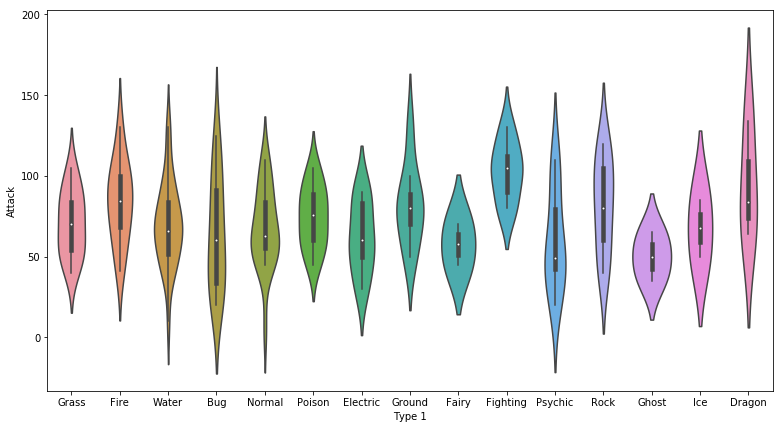

In [10]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Type 1', y='Attack', data=df)

In [11]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

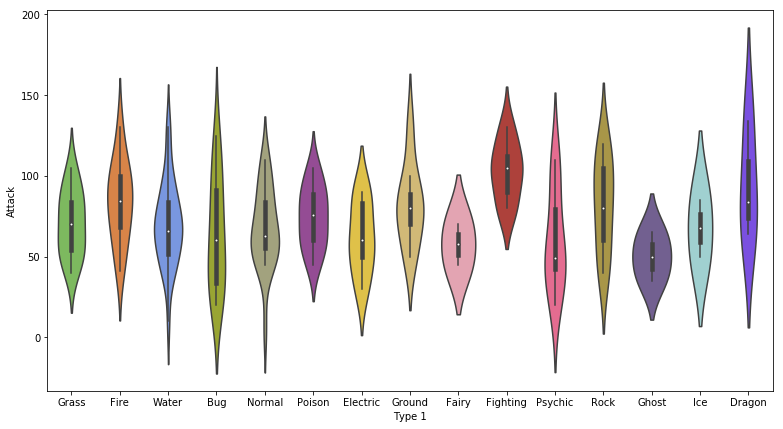

In [12]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

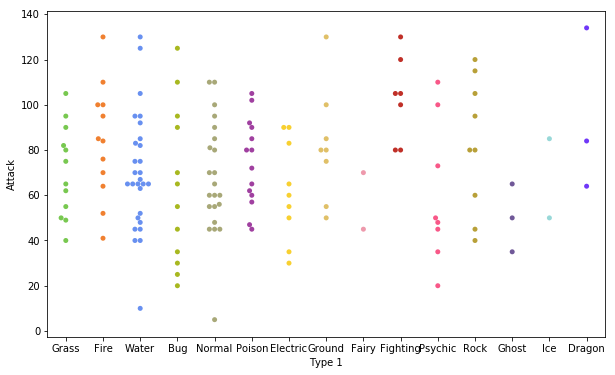

In [13]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Text(0.5,1,'Attack by Type')

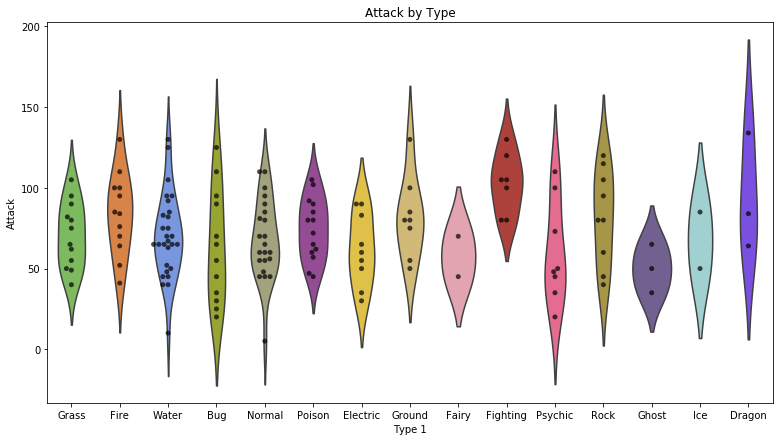

In [14]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Attack by Type')

In [23]:
stats_df.head() #not melted dataframe

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80


### Visualize all Types by Stat

In [15]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(stats_df, 
                  id_vars=['Name', 'Type 1', 'Type 2'], #column to keep not going into the melt.
                  var_name="Stat") #changed into category (one category) date apple banana--- date, fruits, sales #(compare with above)

melt_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,Number,1
1,Ivysaur,Grass,Poison,Number,2
2,Venusaur,Grass,Poison,Number,3
3,Charmander,Fire,NaN,Number,4
4,Charmeleon,Fire,NaN,Number,5


In [24]:
stats_df

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80
5,6,Charizard,Fire,Flying,78,84,78,109,85,100
6,7,Squirtle,Water,NaN,44,48,65,50,64,43
7,8,Wartortle,Water,NaN,59,63,80,65,80,58
8,9,Blastoise,Water,NaN,79,83,100,85,105,78
9,10,Caterpie,Bug,NaN,45,30,35,20,20,45


In [25]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(stats_df.shape)
print(melt_df.shape)

(151, 10)
(1057, 5)


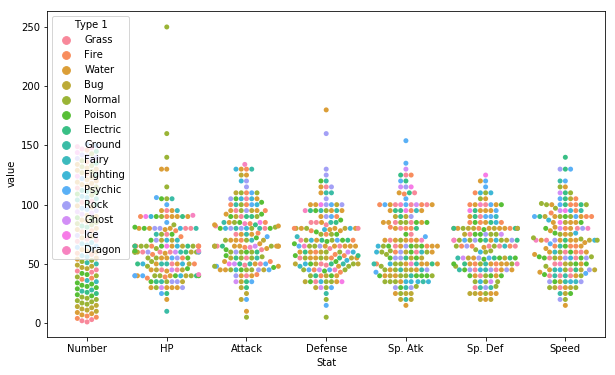

In [26]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='Stat', y='value', 
              data=melt_df,
              hue='Type 1')

This swarm plot is a bit messy, let's clean it up.

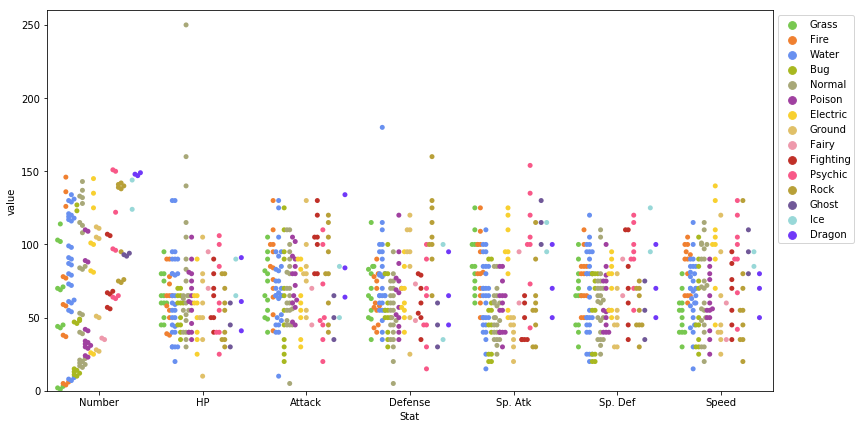

In [27]:
plt.figure(figsize=(13,7))

sns.swarmplot(x='Stat', y='value',
              data=melt_df,
              hue='Type 1', 
              dodge=True, #separate points on chart by hue
              palette=pkmn_type_colors)

#adjust the y-axis
plt.ylim(0,260)

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

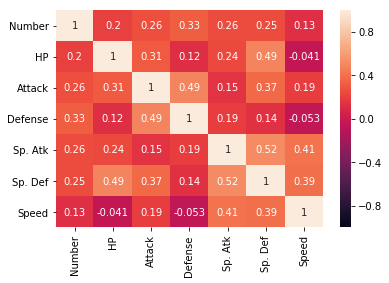

In [19]:
#show correlation of stats via heatmap
corr = stats_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

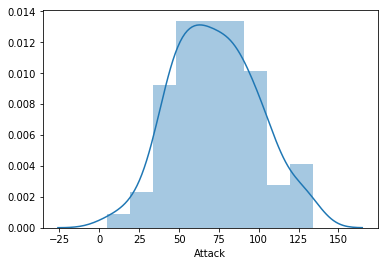

In [28]:
#create a histogram of the distribution of attack power
sns.distplot(df['Attack'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

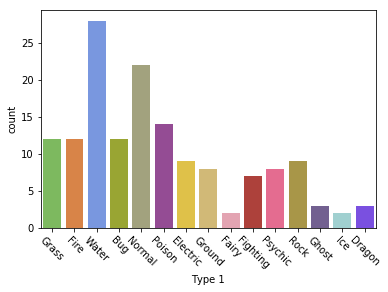

In [29]:
#create a bar plot of Type 1 frequency
sns.countplot(x='Type 1',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

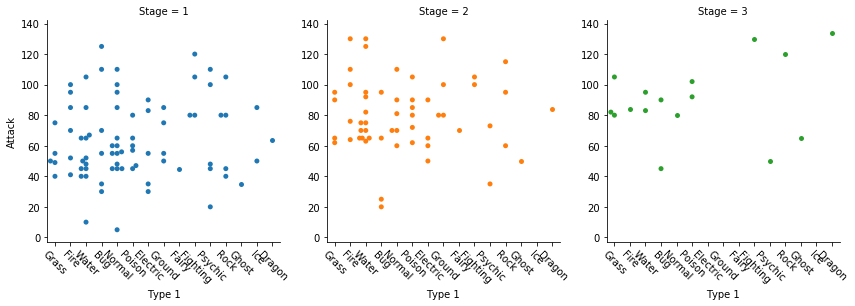

In [30]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='Type 1', y='Attack',
                   data=df,
                   hue='Stage', 
                   col='Stage',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

Source: https://elitedatascience.com/python-seaborn-tutorial